In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import random
import time

In [76]:
class ShufflingGeneratorWithRange:
    def __init__(self, seed, upper_bound):
        self.size = len(str(seed))
        self.state = seed
        self.upper_bound = upper_bound

    def next(self):
        # Вычисляем смещение на 1/4 длины ячейки
        shift = len(str(self.state)) // 4

        # Циклический сдвиг влево на 1/4 длины ячейки
        left_shifted = int(str(self.state)[shift:] + str(self.state)[:shift])

        # Циклический сдвиг вправо на 1/4 длины ячейки
        right_shifted = int(str(self.state)[-shift:] + str(self.state)[:-shift])
        
        # Сумма полученных чисел
        new_number = int(str(left_shifted + right_shifted)[:self.size])
        
        # Обновляем состояние
        self.state = new_number

        return new_number % self.upper_bound


In [13]:
class StdGeneratorWithRange:
    def __init__(self, upper_bound):
        self.upper_bound = upper_bound
        
    def next(self):
        return random.randint(0, self.upper_bound)
    

In [145]:
class RandomNumberAnalyzer:
    def __init__(self, generator, sample_size):
        self.generator = generator
        self.sample_size = sample_size
        self.random_numbers = []

    def generate_numbers(self):
        self.random_numbers = [self.generator.next() for _ in range(self.sample_size)]

    def calculate_statistics(self):
        mean = sum(self.random_numbers) / self.sample_size
        variance = sum((x - mean) ** 2 for x in self.random_numbers) / self.sample_size
        std_deviation = math.sqrt(variance)
        return mean, variance, std_deviation

    def plot_distribution(self):
        num_bins = self._bins(self.sample_size)
        plt.hist(
            self.random_numbers, 
            bins=num_bins, 
            weights=np.ones(self.sample_size) / self.sample_size, 
            edgecolor='black'
        )
        plt.hlines(1/num_bins, 0, max(self.random_numbers), linestyles='dashed', color='red')
        plt.title(f'Distribution Plot ({self.sample_size} numbers)')
        plt.xlabel('Random Numbers')
        plt.ylabel('Frequency')
        plt.show()
        
    def _bins(self, sample_size_value):
        if sample_size_value <= 100:
            return 10
        elif sample_size_value <= 10000:
            return 100
        else:
            return 1000
        
    def analyze(self):
        self.generate_numbers()
        statistics = self.calculate_statistics()
        self.plot_distribution()

        result_table = pd.DataFrame({
            'Sample Size': [self.sample_size],
            'Mean': [statistics[0]],
            'Variance': [statistics[1]],
            'Std Deviation': [statistics[2]]
        })

        print(result_table)

In [285]:

class RandomNumberComparator:
    
    def __init__(self, generator, mean):
        self.generator = generator
        self.mean = mean
        
        self.sample_size = 10000
        self.batch_size = 1000
        self.random_numbers = []
    
    def generate_numbers(self):
        self.random_numbers = [self.generator.next() for _ in range(self.sample_size)]
        
    def calculate_mean(self, random_numbers):
        return sum(random_numbers) / len(random_numbers)
    
    def analyze(self):
        self.generate_numbers()
        
        result_table = pd.DataFrame(columns=['M1', 'M1-M', 'M2', 'M2-M'])
        
        for idx in range(10):
            offset = idx * self.batch_size
            limit = (idx+1) * self.batch_size
            M1 = self.calculate_mean(self.random_numbers[offset:limit])
            M2 = self.calculate_mean(self.random_numbers[:limit])
            result_table.loc[len(result_table)] = [M1, M1-self.mean, M2, M2-self.mean]
        
        return result_table


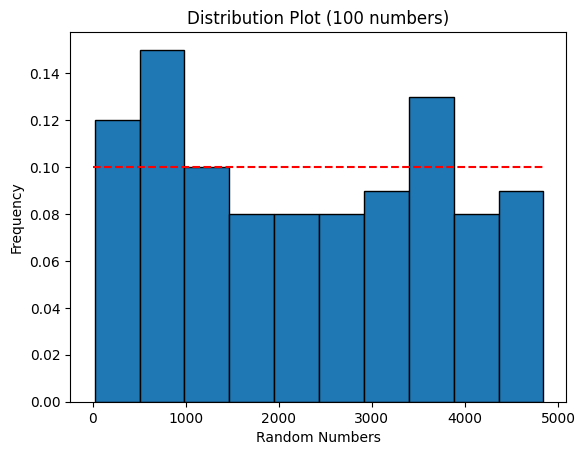

   Sample Size     Mean      Variance  Std Deviation
0          100  2332.45  2.098688e+06     1448.68502


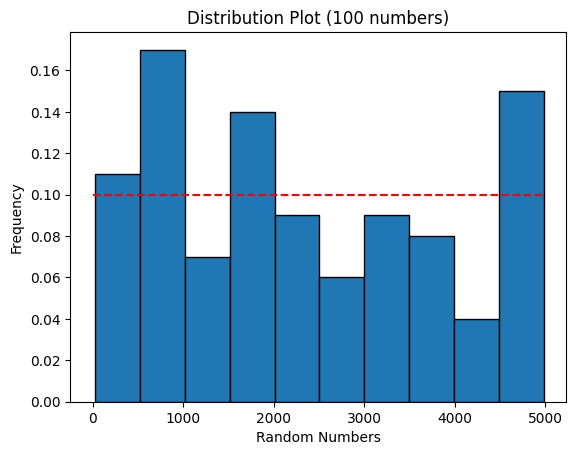

   Sample Size     Mean      Variance  Std Deviation
0          100  2372.66  2.237663e+06    1495.882042


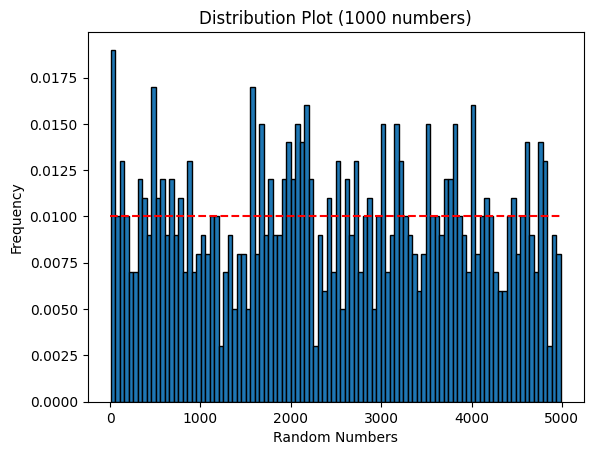

   Sample Size    Mean     Variance  Std Deviation
0         1000  2465.3  2074858.248    1440.436825


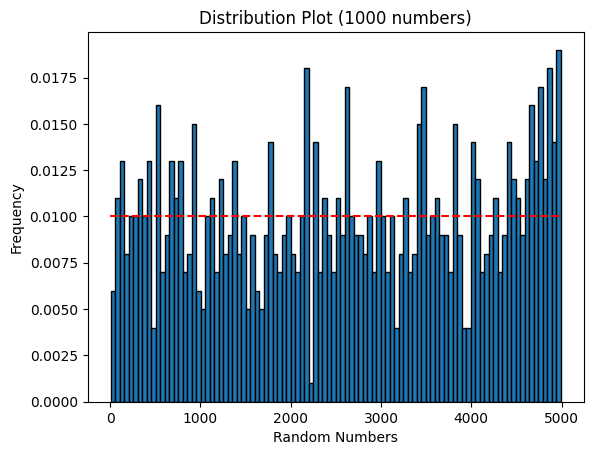

   Sample Size      Mean      Variance  Std Deviation
0         1000  2605.923  2.250791e+06    1500.263792


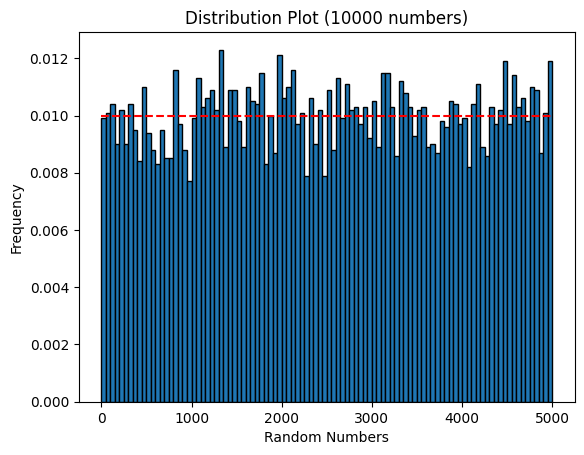

   Sample Size       Mean      Variance  Std Deviation
0        10000  2519.2925  2.074681e+06    1440.375232


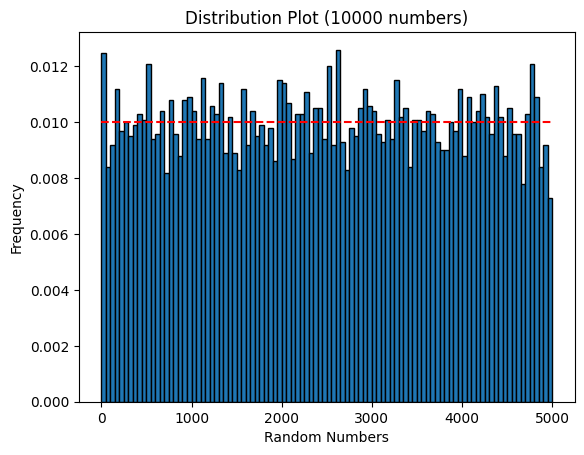

   Sample Size       Mean      Variance  Std Deviation
0        10000  2486.1505  2.068109e+06    1438.092213


In [245]:
upper_bound_value = 5000

for sample_size_value in [100, 1000, 10000]:
    seed_value = time.time_ns()
    
    analyzer = RandomNumberAnalyzer(ShufflingGeneratorWithRange(seed_value, upper_bound_value), sample_size_value)
    analyzer.analyze()
    
    analyzer = RandomNumberAnalyzer(StdGeneratorWithRange(upper_bound_value), sample_size_value)
    analyzer.analyze()


In [ ]:
comparator = RandomNumberComparator(StdGeneratorWithRange(upper_bound_value), 2500)
comparator.analyze()

In [287]:
seed_value = time.time_ns()
comparator = RandomNumberComparator(ShufflingGeneratorWithRange(seed_value, upper_bound_value), 2500)
comparator.analyze()

,M1,M1-M,M2,M2-M
0,2549.227,49.227,2549.227000,49.227000
1,2578.327,78.327,2563.777000,63.777000
2,2427.325,-72.675,2518.293000,18.293000
3,2518.562,18.562,2518.360250,18.360250
4,2496.062,-3.938,2513.900600,13.900600
5,2517.854,17.854,2514.559500,14.559500
6,2516.664,16.664,2514.860143,14.860143
7,2568.268,68.268,2521.536125,21.536125
8,2470.153,-29.847,2515.826889,15.826889
9,2480.367,-19.633,2512.280900,12.280900


[2]